EDA

In [3]:
## 📚 1. Setup, Data Preparation, and Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure pandas and plot styles
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

# --- 1.1. Data Loading and Initial Inspection ---
file_path = '../datasets/Supplement_Sales_Weekly_Expanded.csv'
try:
    df = pd.read_csv(file_path)
except:
    raise FileNotFoundError("Please ensure the Supplement_Sales_Weekly_Expanded.csv file path is correct.")

# Ensure Date is in datetime format for time-series analysis
df["Date"] = pd.to_datetime(df["Date"])

print("--- Data Head ---")
print(df.head())
print("\n")
print("--- Data Info ---")
df.info()
print("\n")
print("--- Missing Values and Duplicates ---")
print("Missing values per column:\n", df.isnull().sum()) # Content of Cell 2
print("Duplicated rows:", df.duplicated().sum()) # Content of Cell 2

--- Data Head ---
        Date  Product_Name     Category  Units_Sold  Price  Revenue  Discount  \
0 2020-01-06  Whey Protein      Protein         143  31.98  4573.14      0.03   
1 2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89      0.04   
2 2020-01-06      Fish Oil        Omega         161  12.91  2078.51      0.25   
3 2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80      0.08   
4 2020-01-06   Pre-Workout  Performance         157  35.47  5568.79      0.25   

   Units_Returned Location Platform  
0               2   Canada  Walmart  
1               0       UK   Amazon  
2               0   Canada   Amazon  
3               0   Canada  Walmart  
4               3   Canada    iHerb  


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null  

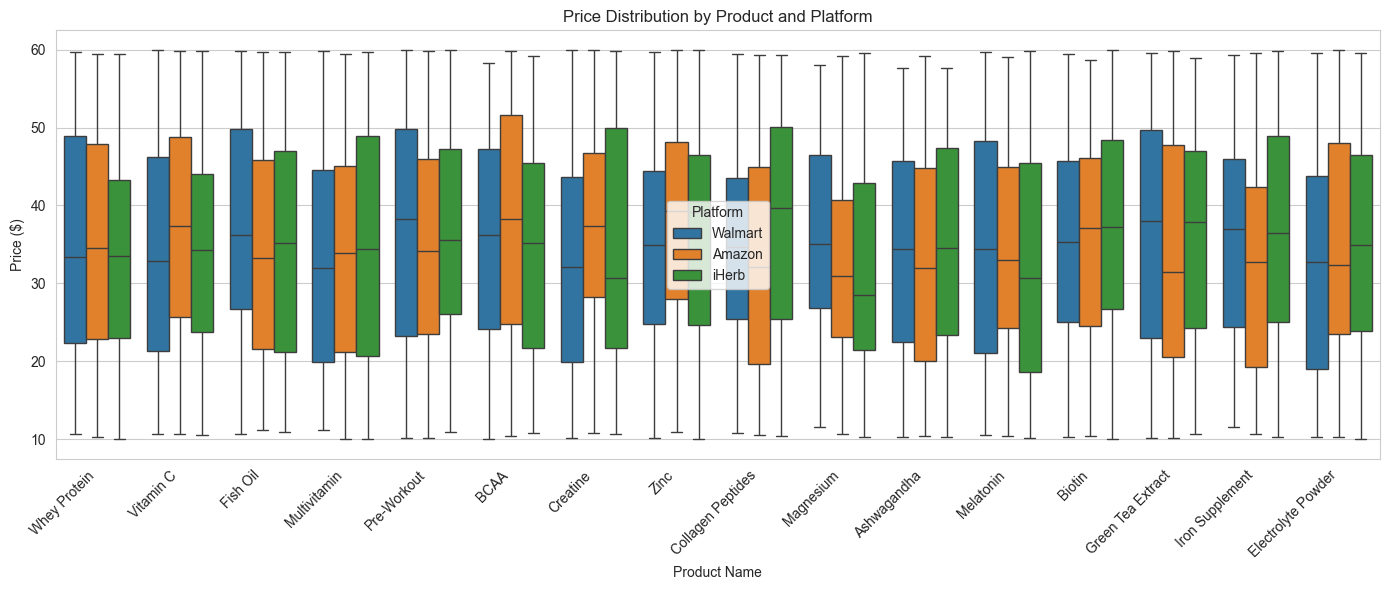

In [4]:
## 📊 2. Price Distribution and Competitor Analysis

# Show the overall price distribution by product and platform
plt.figure(figsize=(14,6))
sns.boxplot(x="Product_Name", y="Price", hue="Platform", data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Price Distribution by Product and Platform")
plt.ylabel("Price ($)")
plt.xlabel("Product Name")
plt.tight_layout()
plt.show()

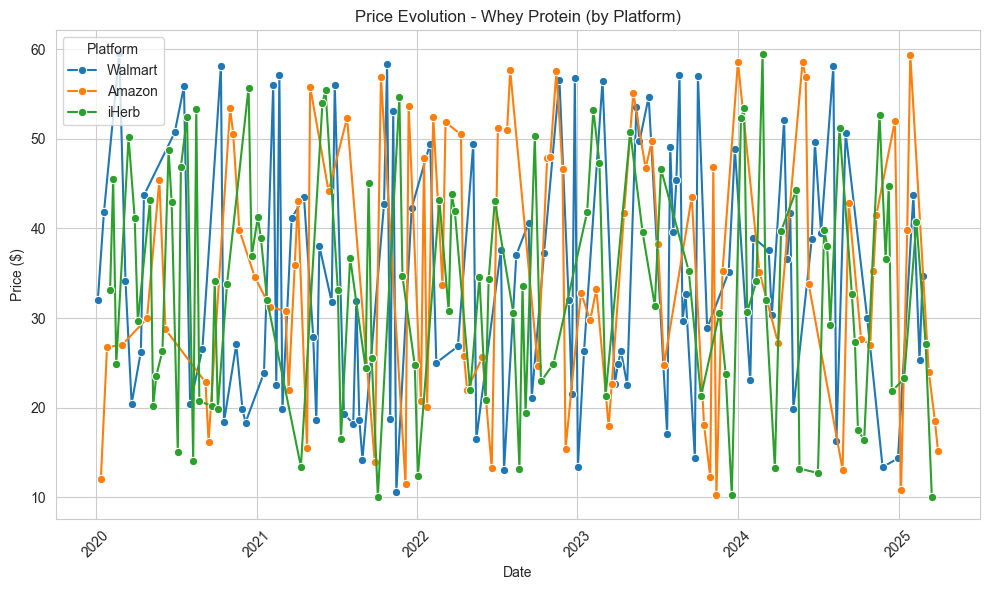

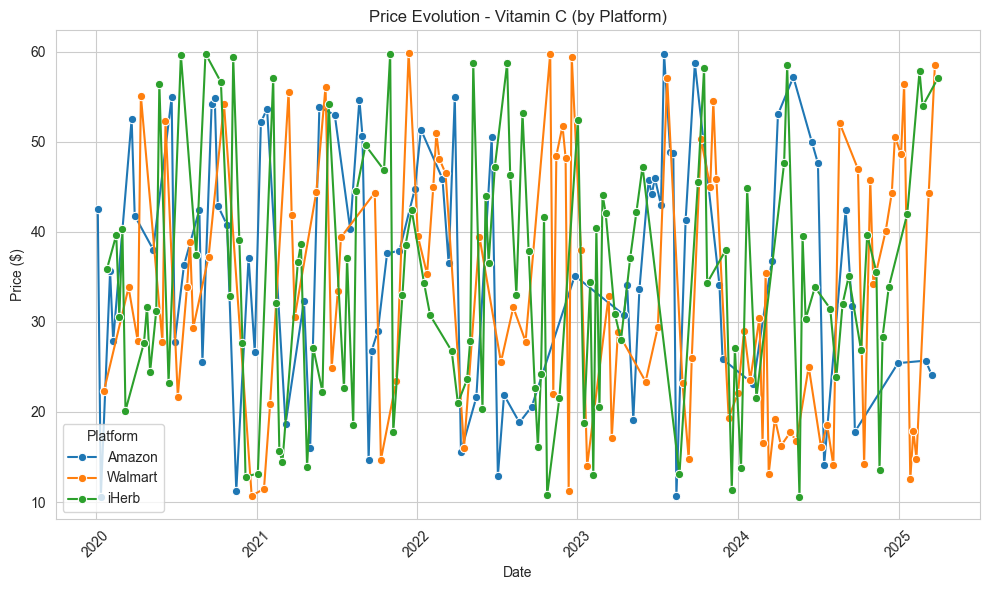

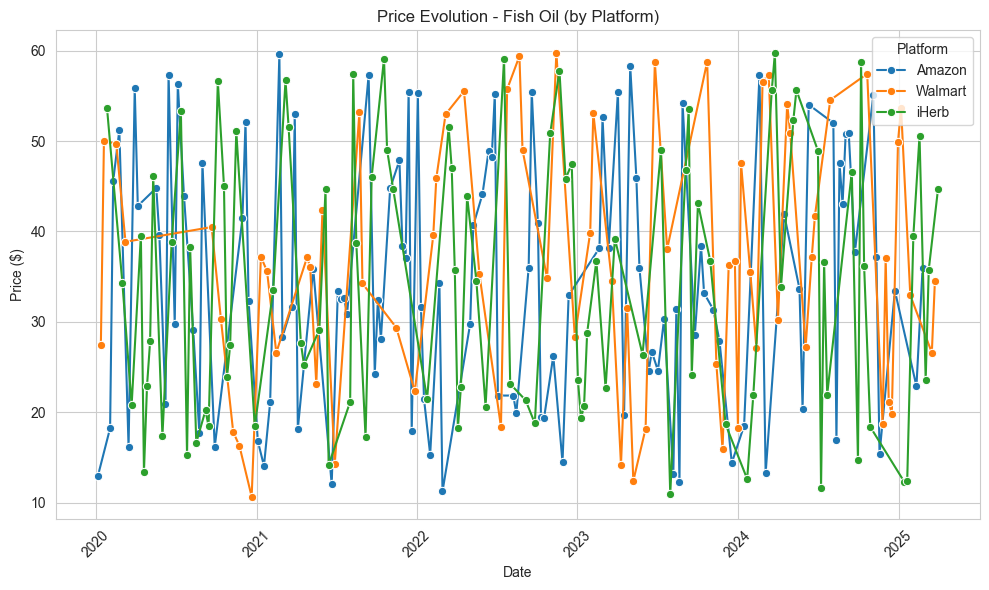

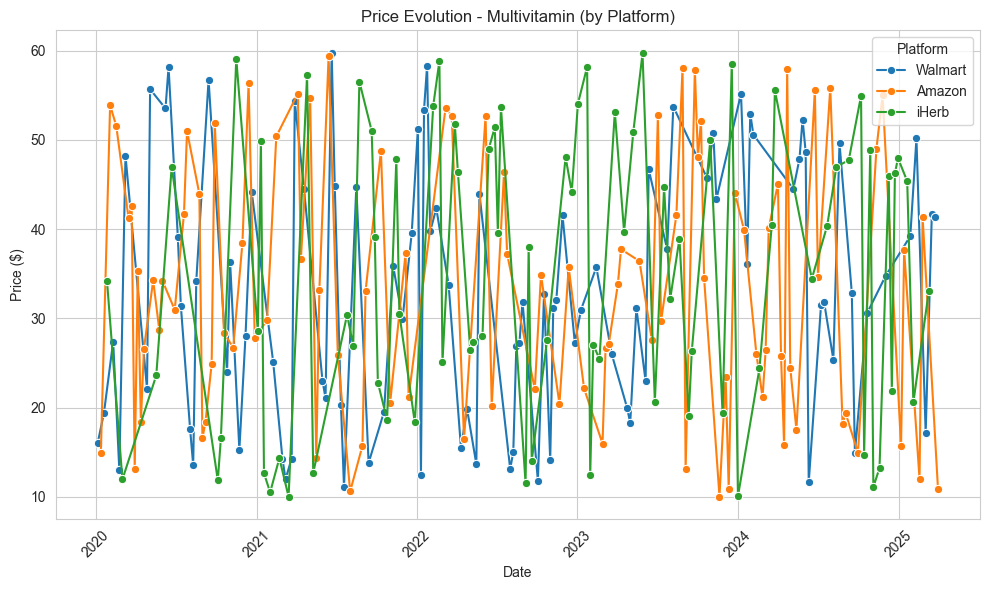

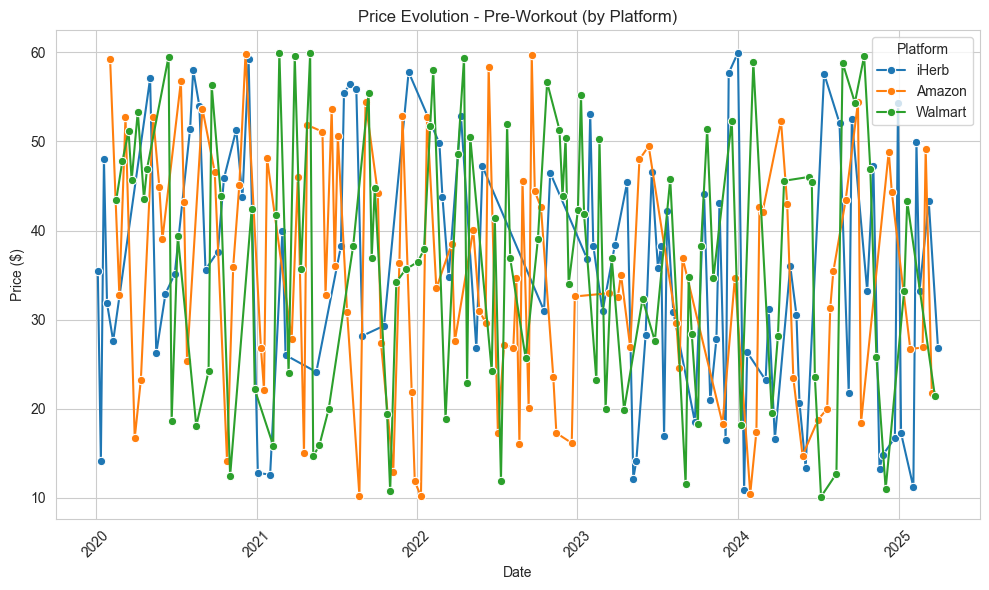

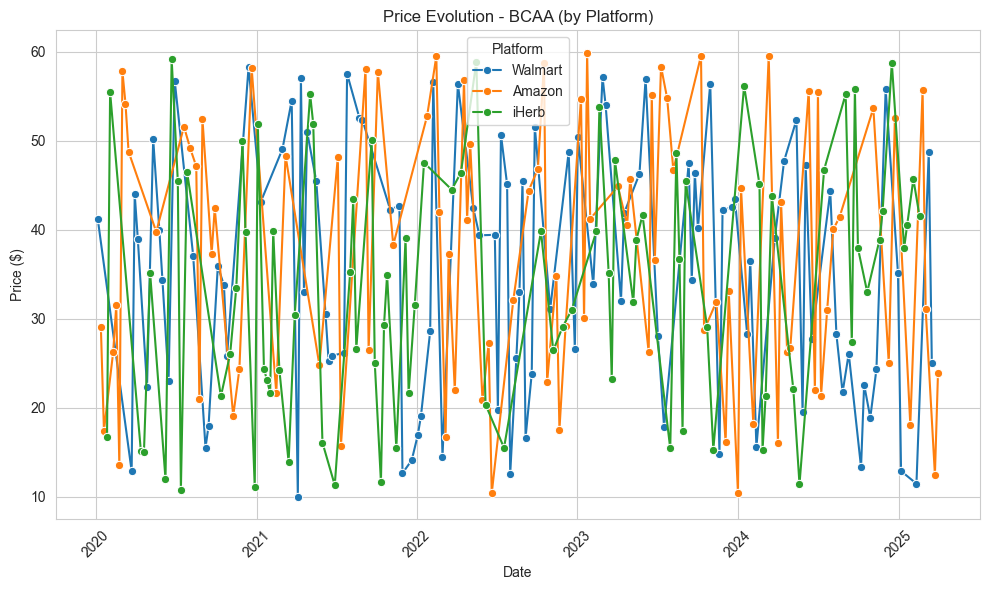

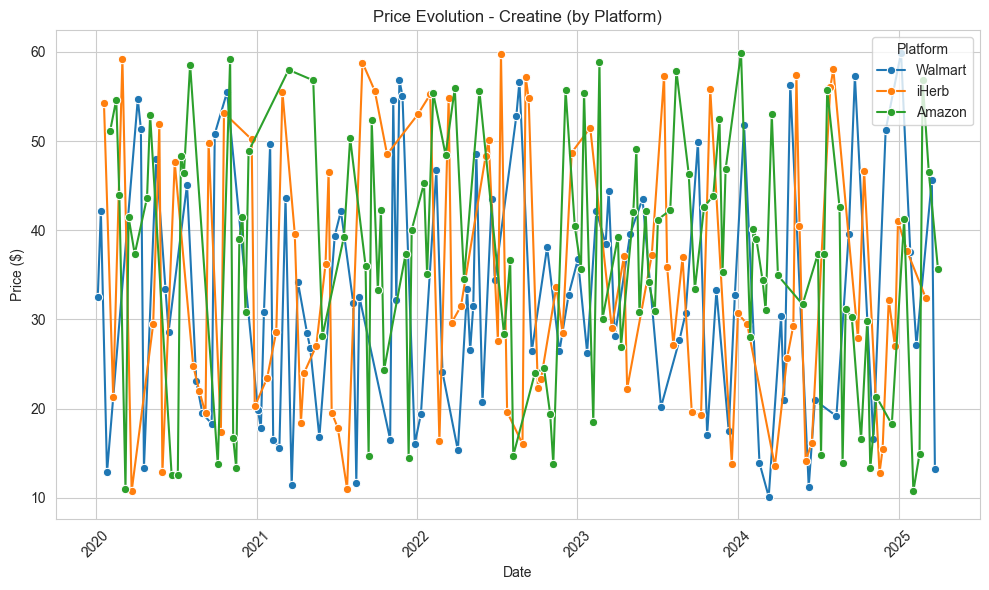

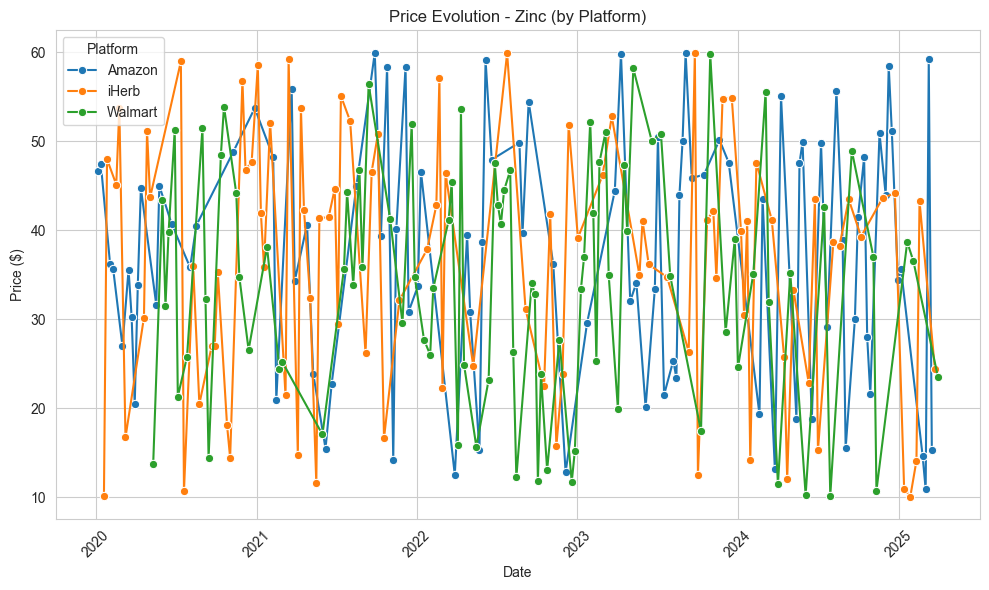

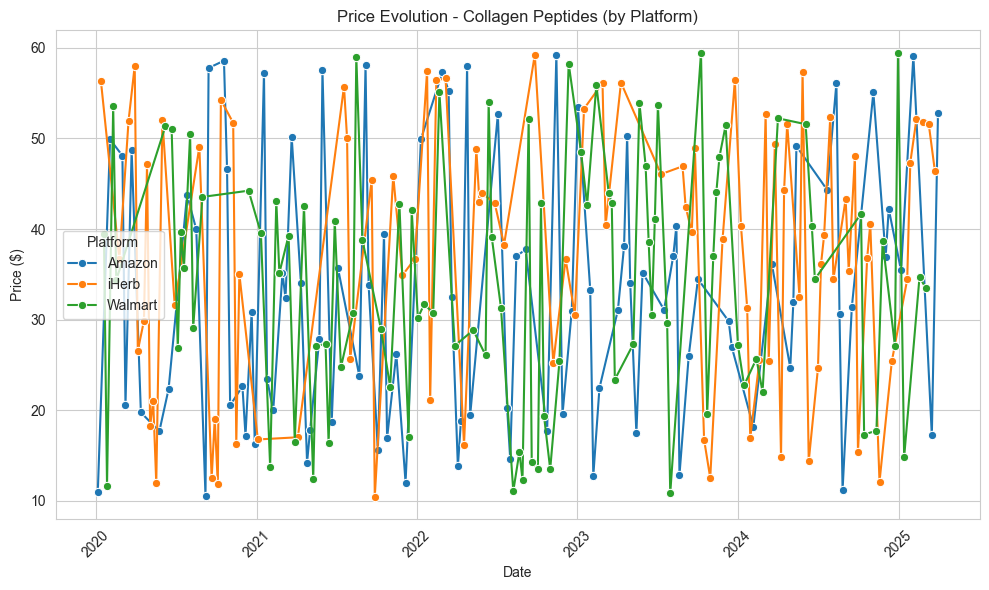

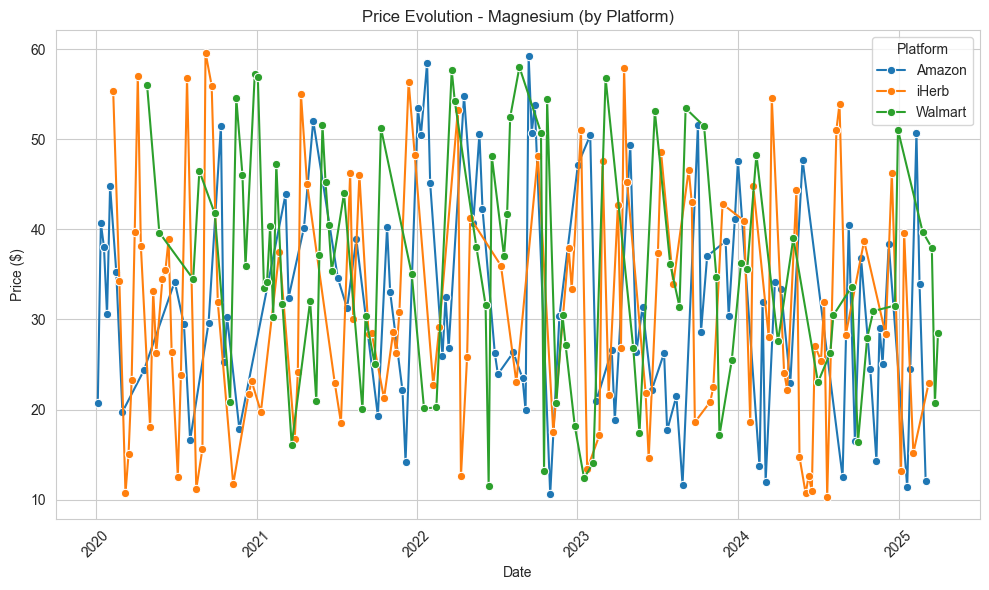

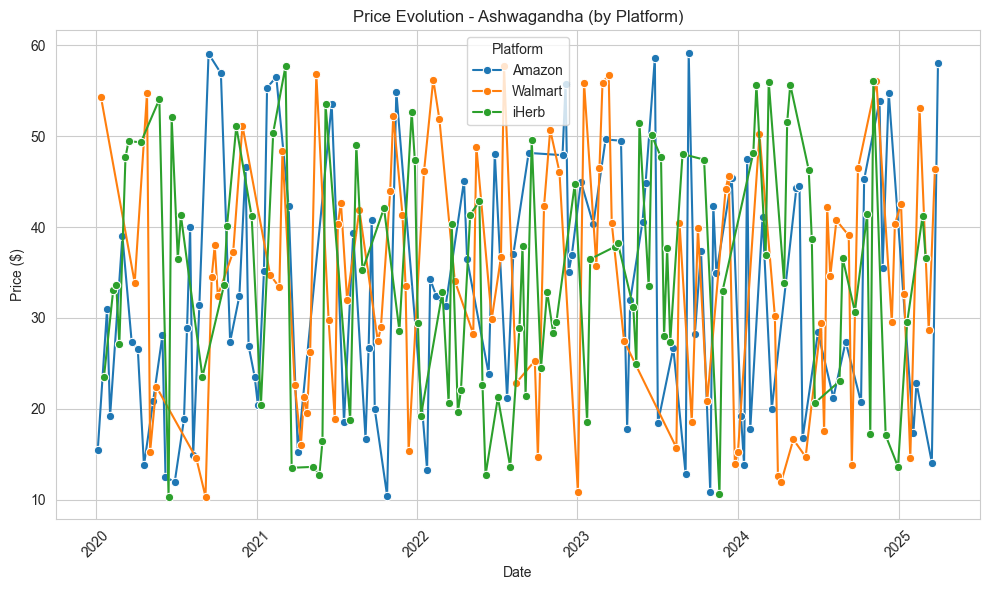

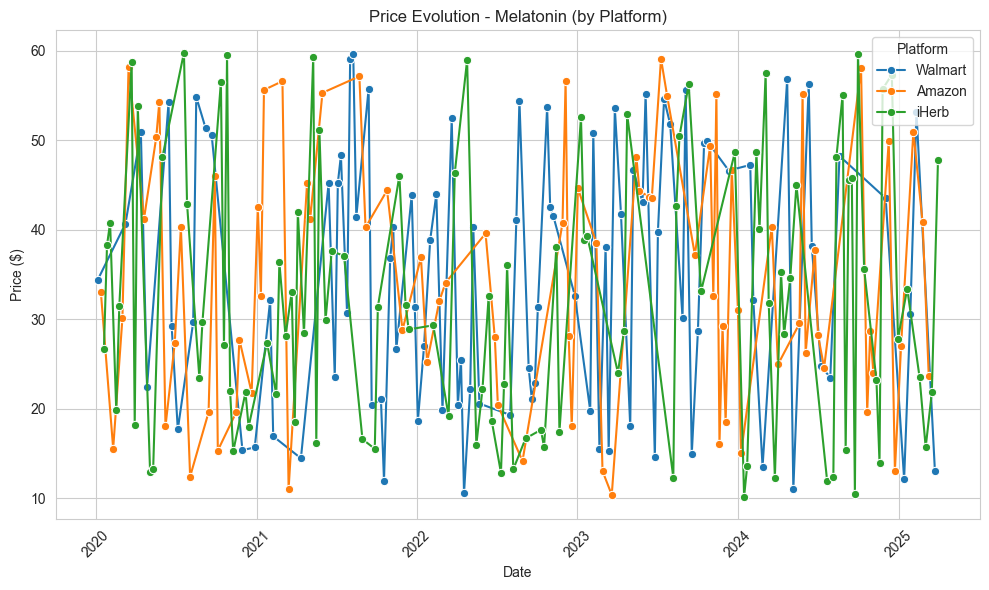

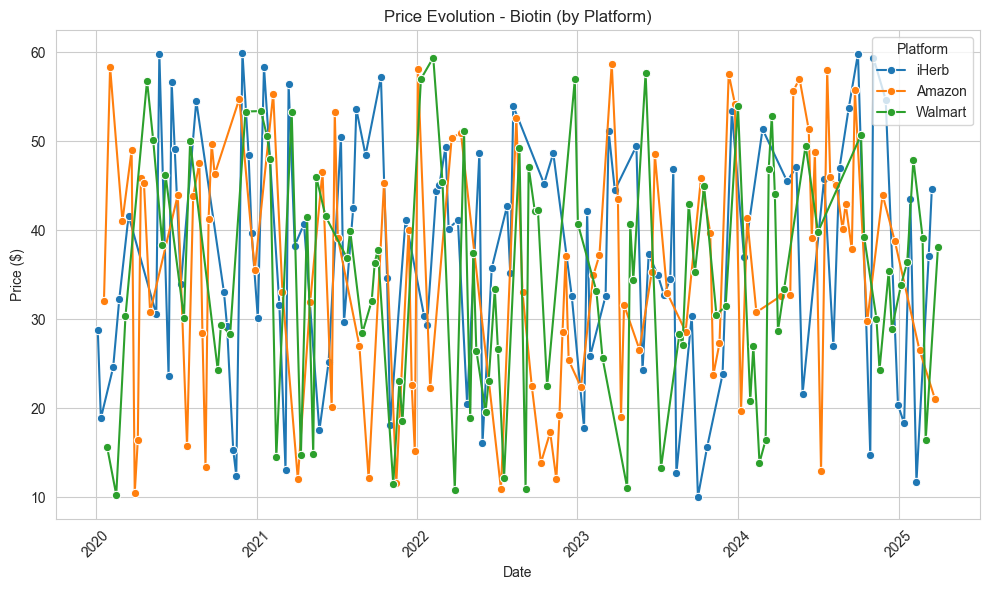

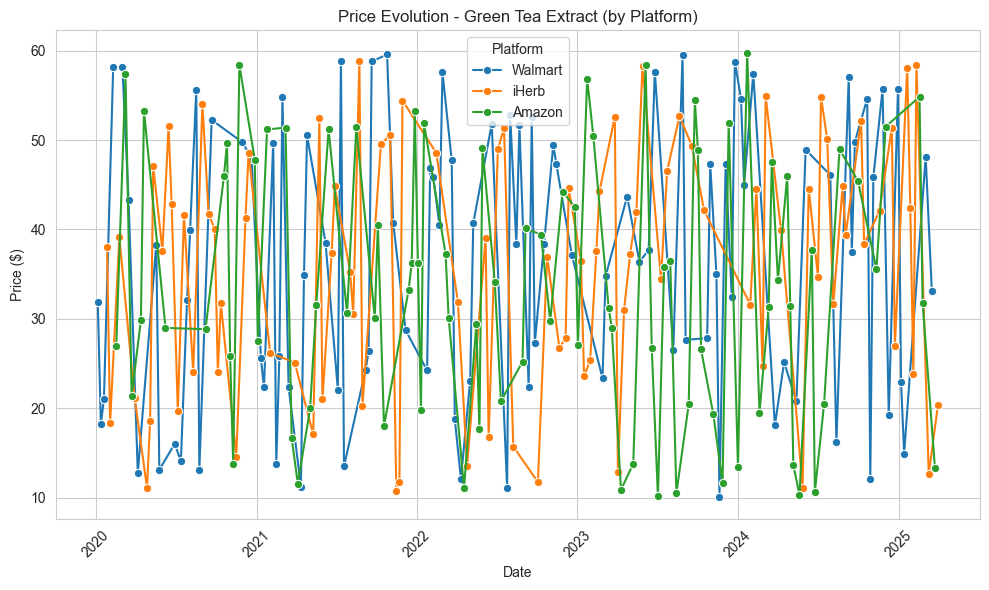

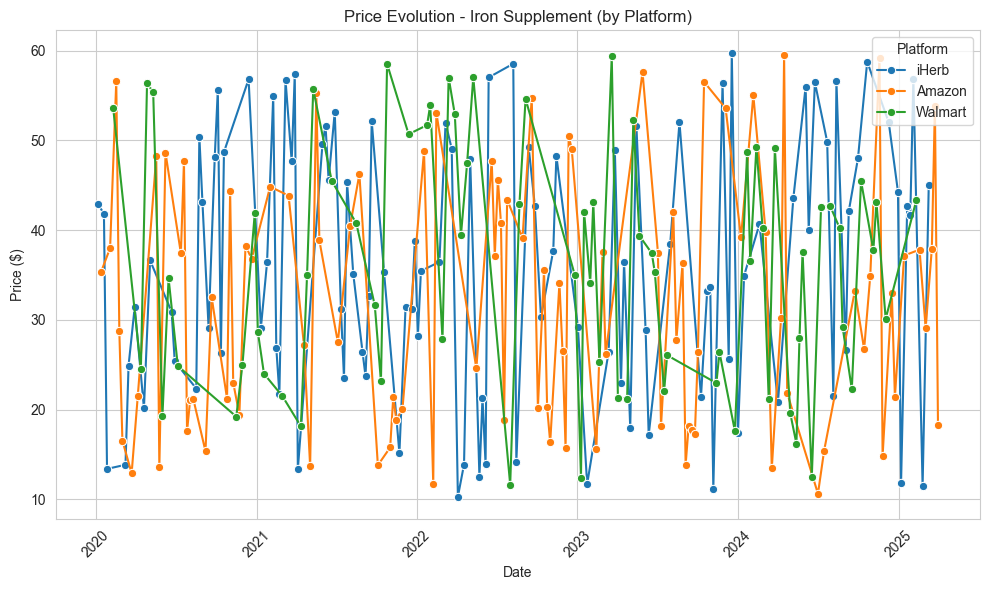

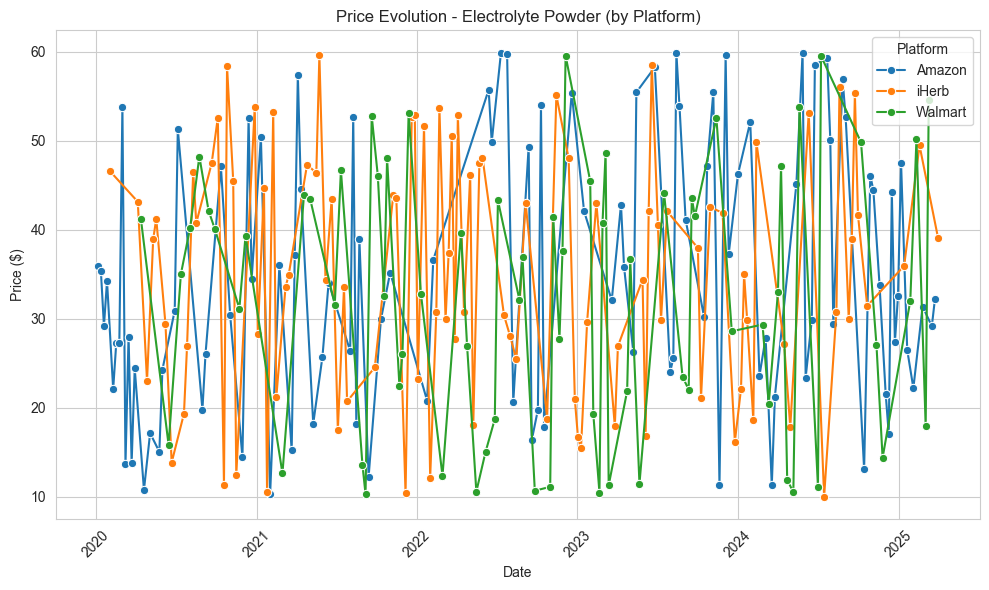

In [5]:
## 📈 3. Time-Series Analysis: Price Evolution

# --- 3.1. Price Evolution Over Time (Platform Comparison) ---
productos = df["Product_Name"].unique()

for producto in productos:
    subset = df[df["Product_Name"] == producto]
    
    plt.figure(figsize=(10,6))
    sns.lineplot(
        x="Date",
        y="Price",
        hue="Platform",   # Differentiate Amazon, Walmart, iHerb
        data=subset,
        marker="o"
    )
    
    plt.title(f"Price Evolution - {producto} (by Platform)")
    plt.xticks(rotation=45)
    plt.ylabel("Price ($)")
    plt.xlabel("Date")
    plt.legend(title="Platform")
    plt.tight_layout()
    plt.show()

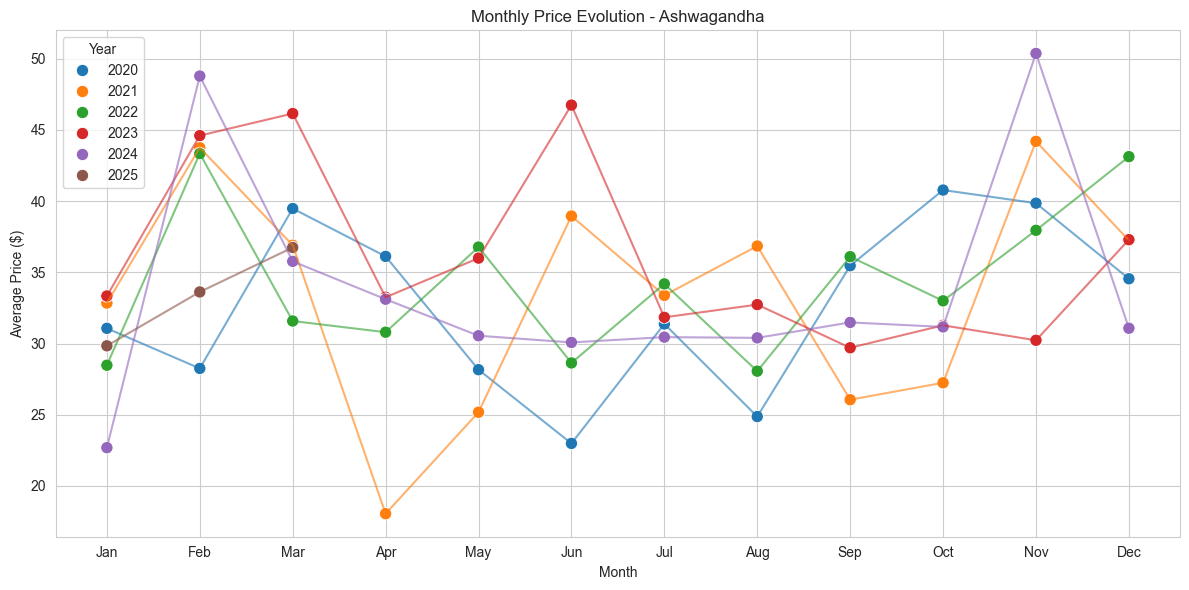

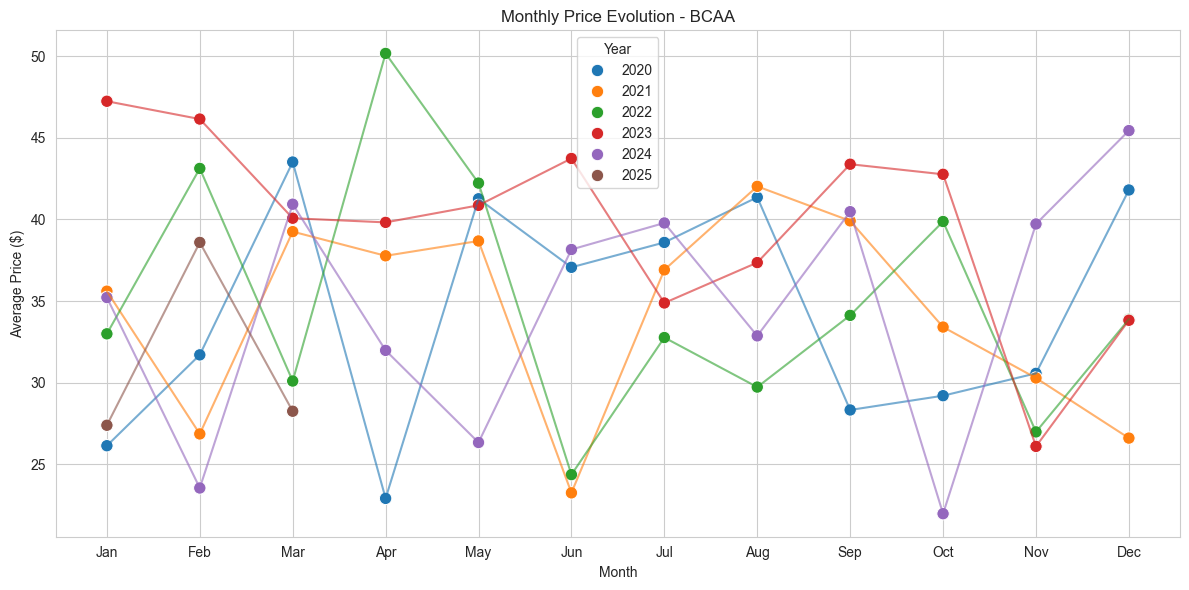

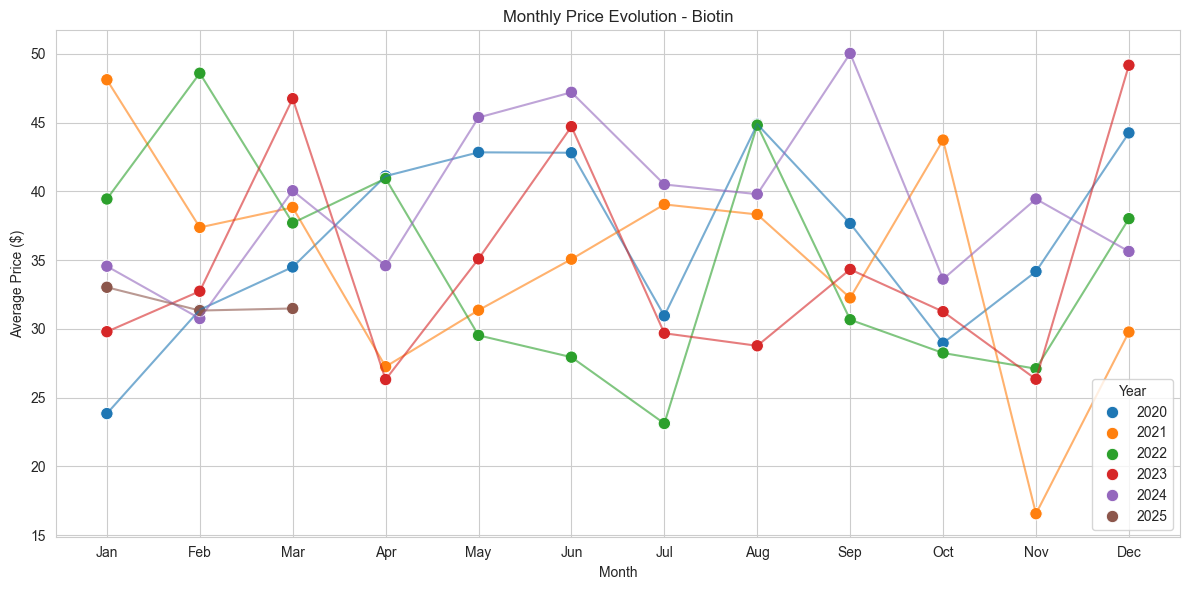

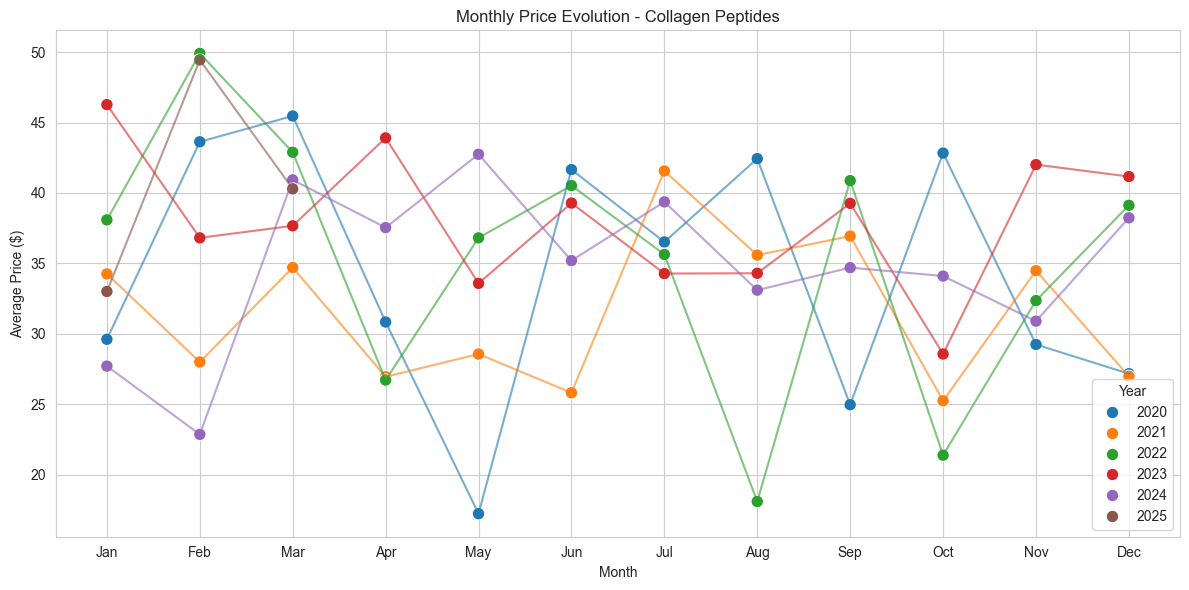

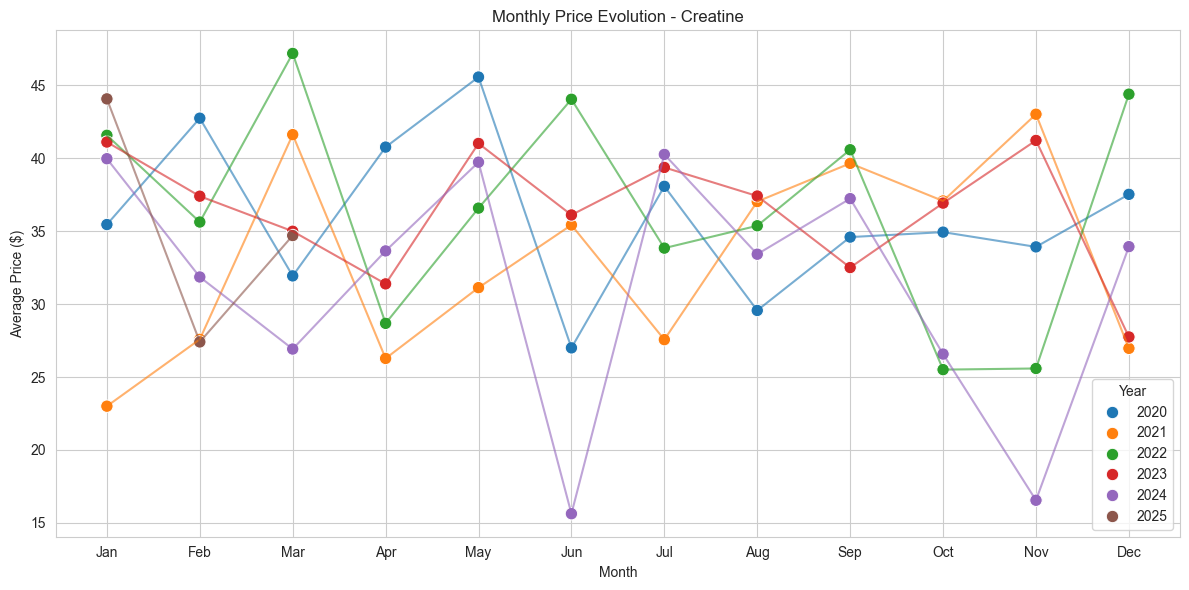

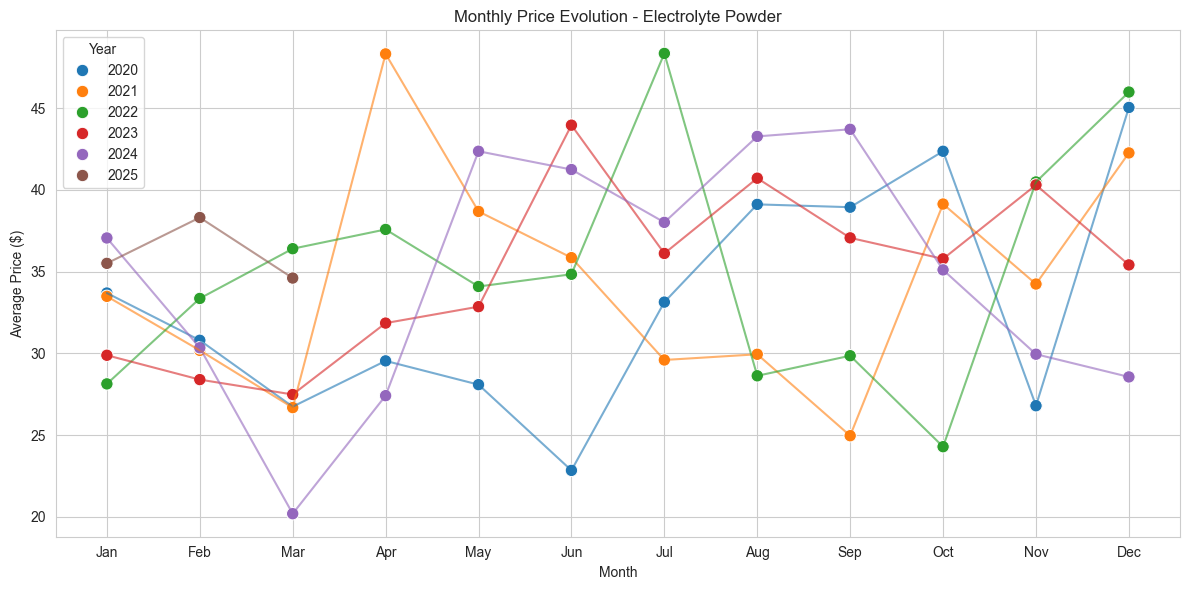

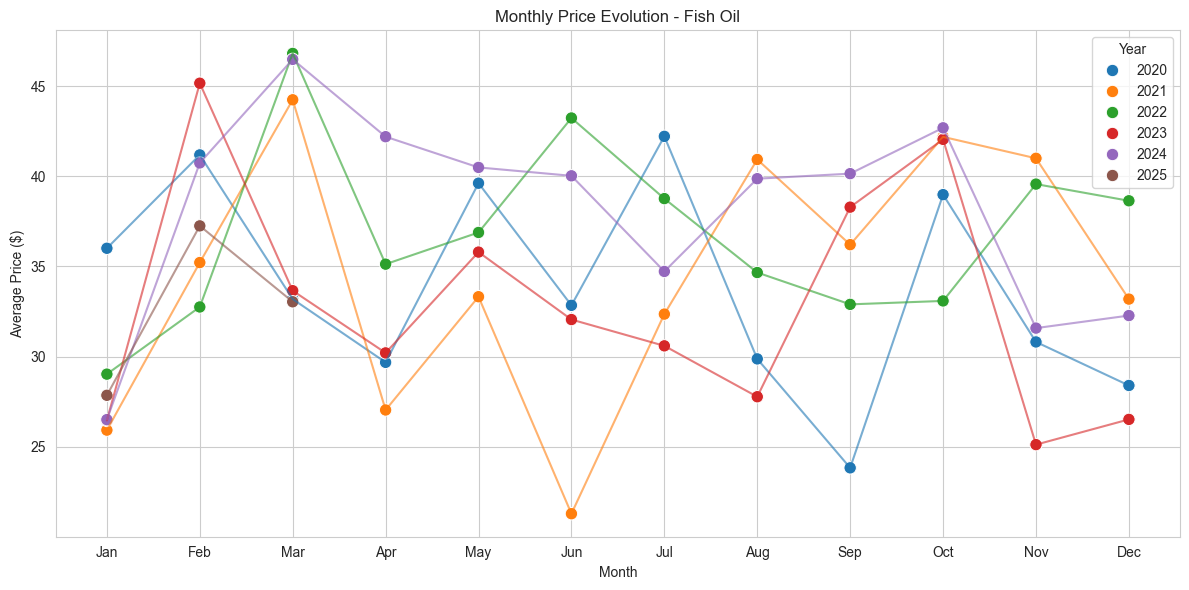

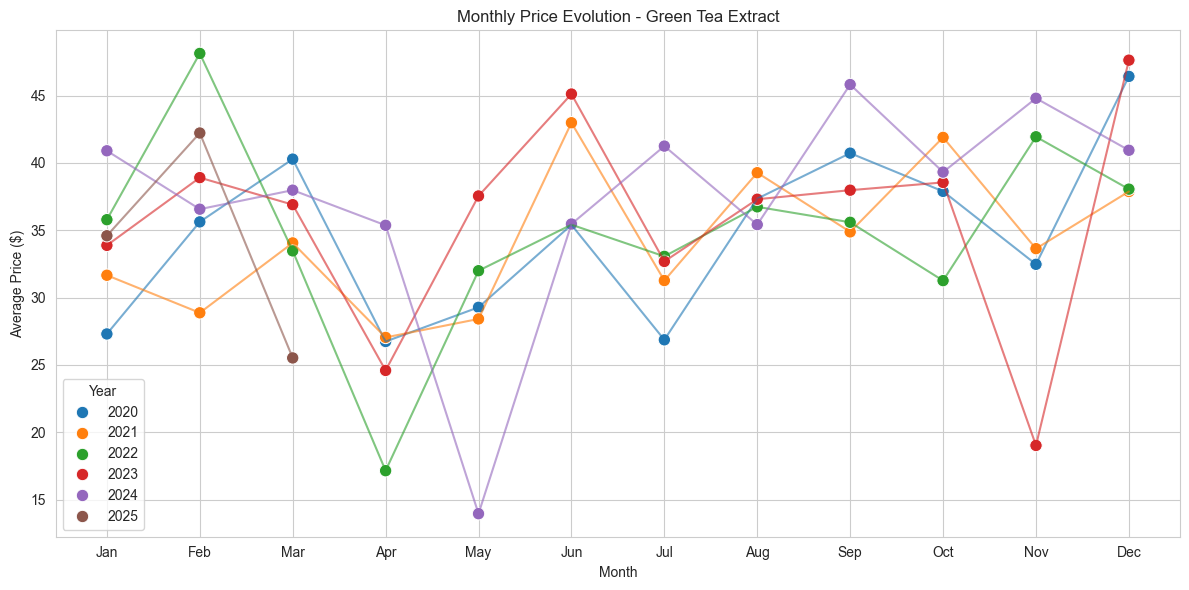

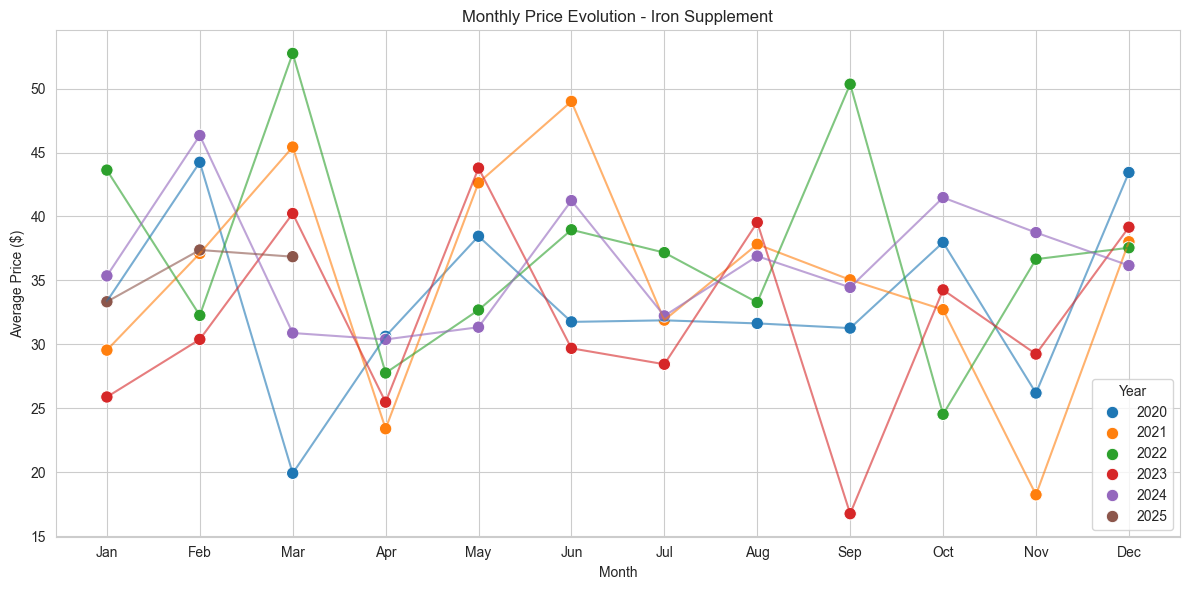

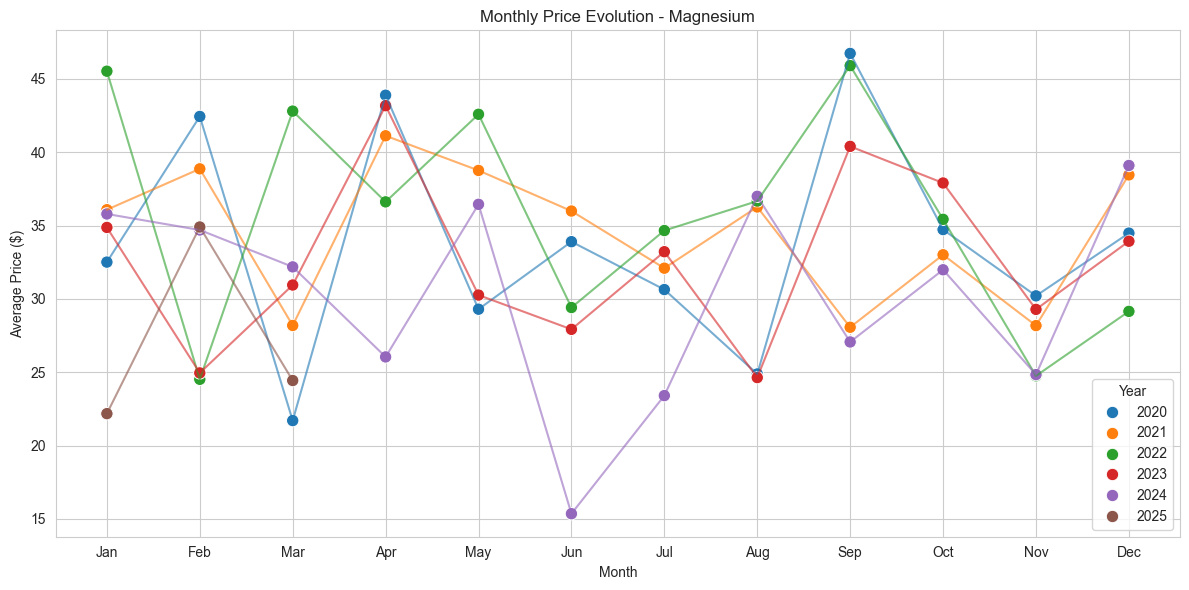

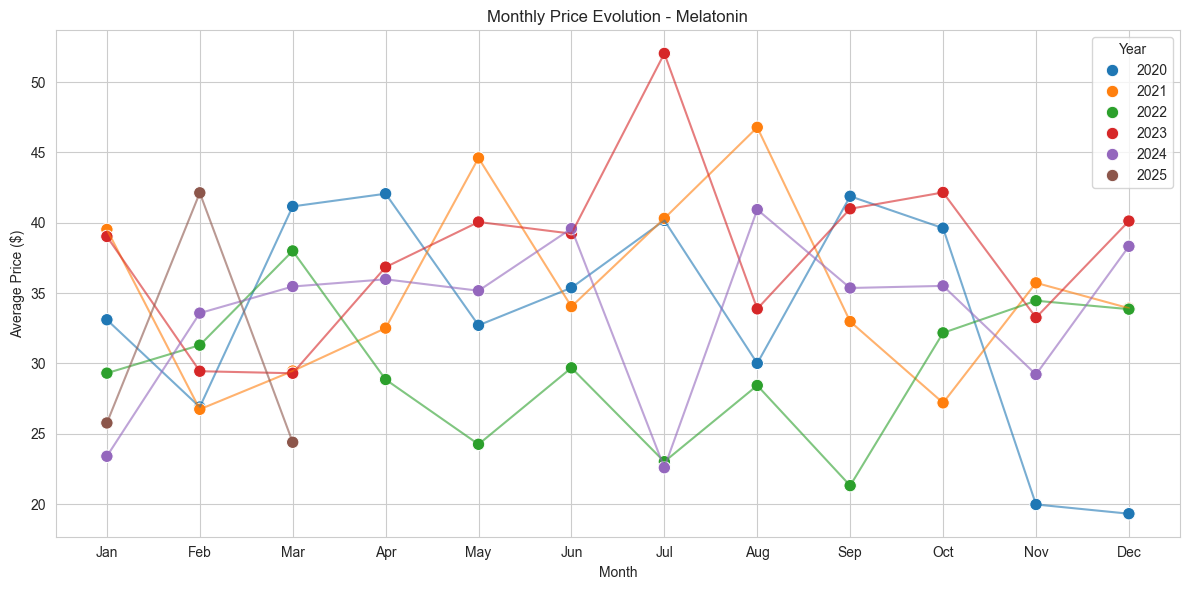

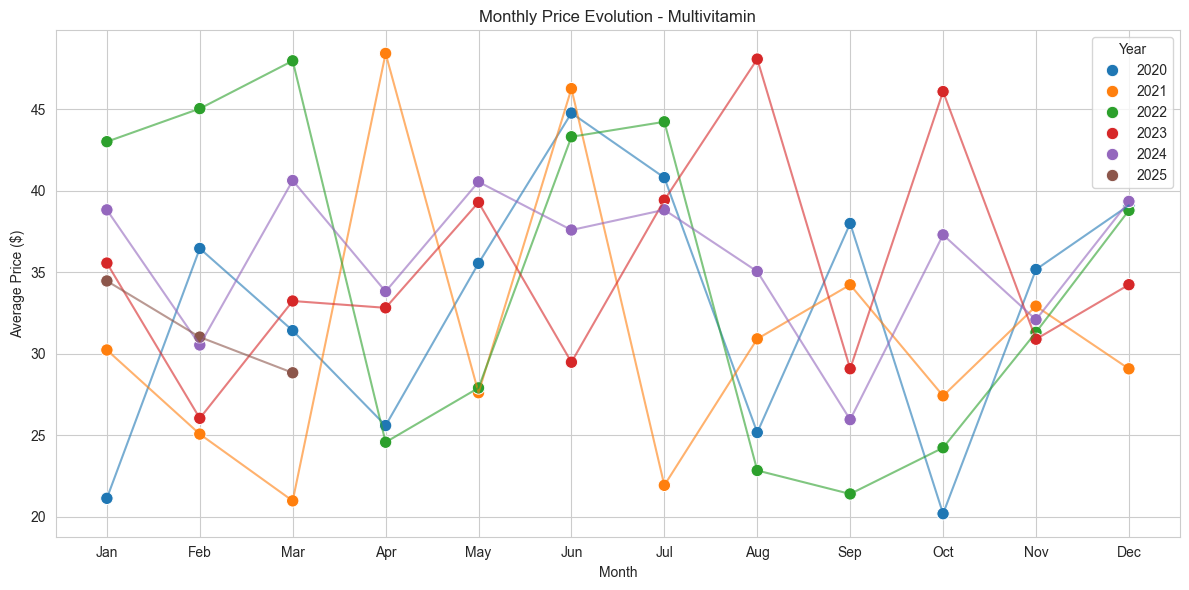

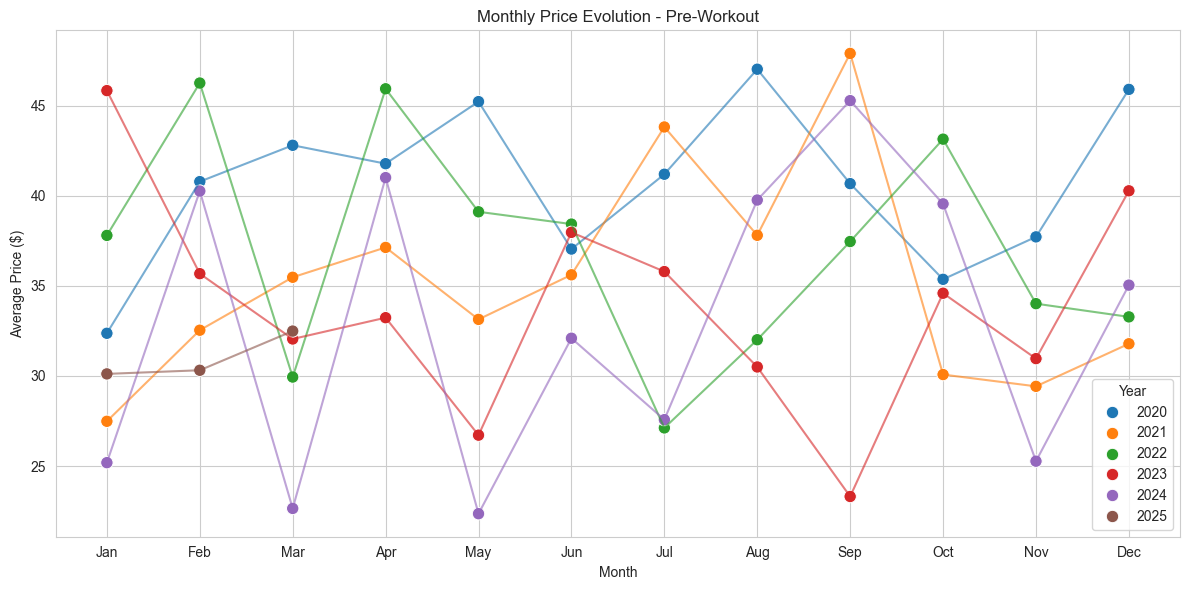

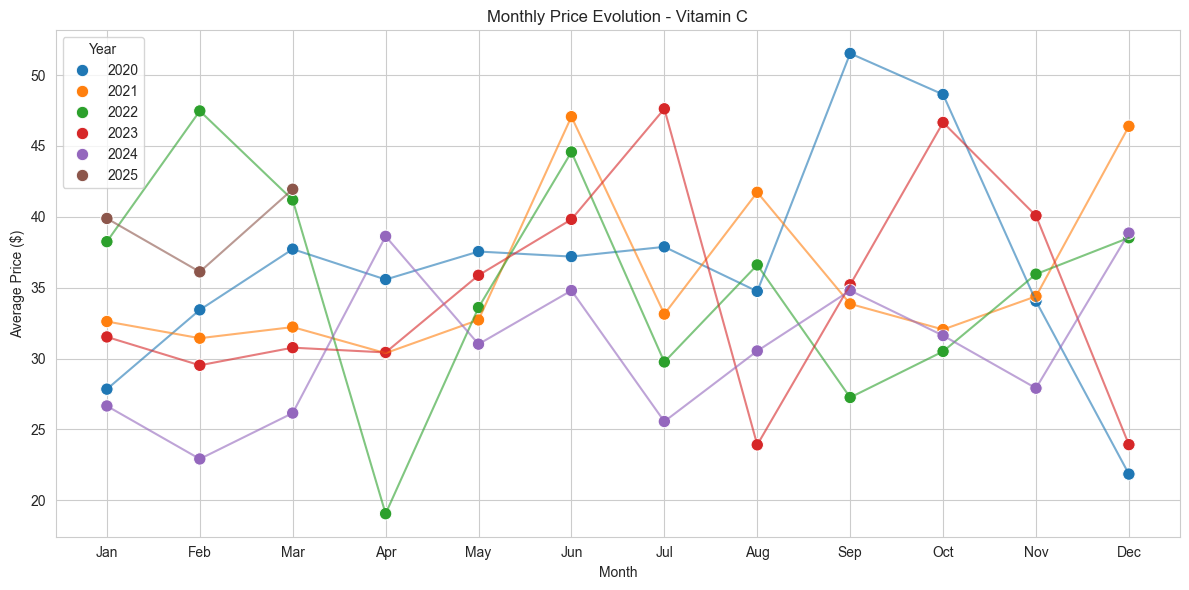

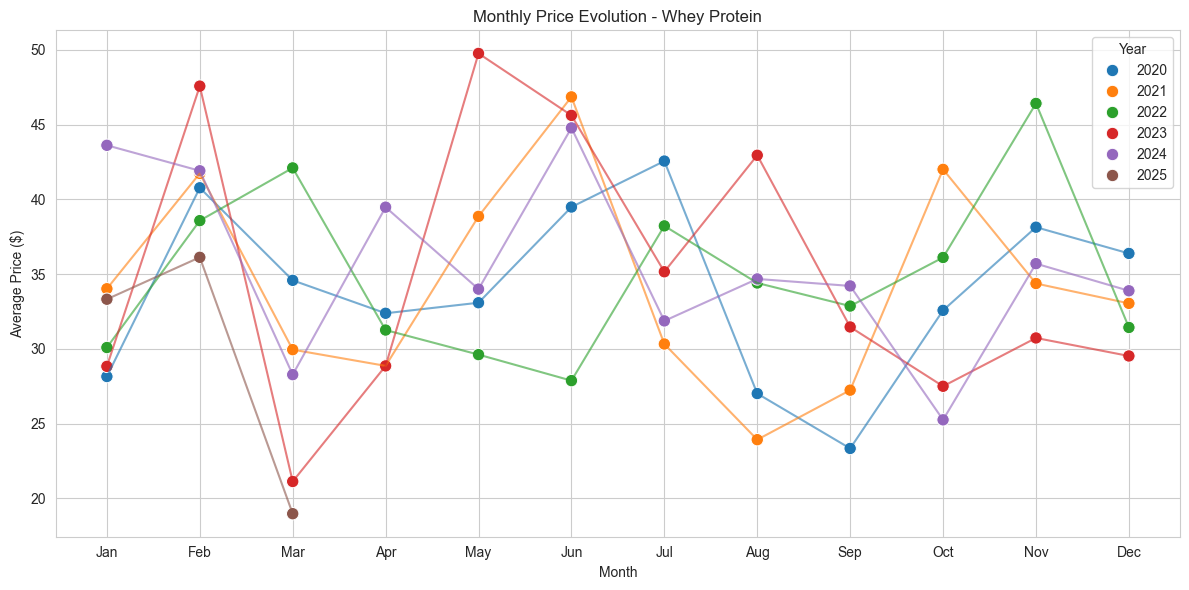

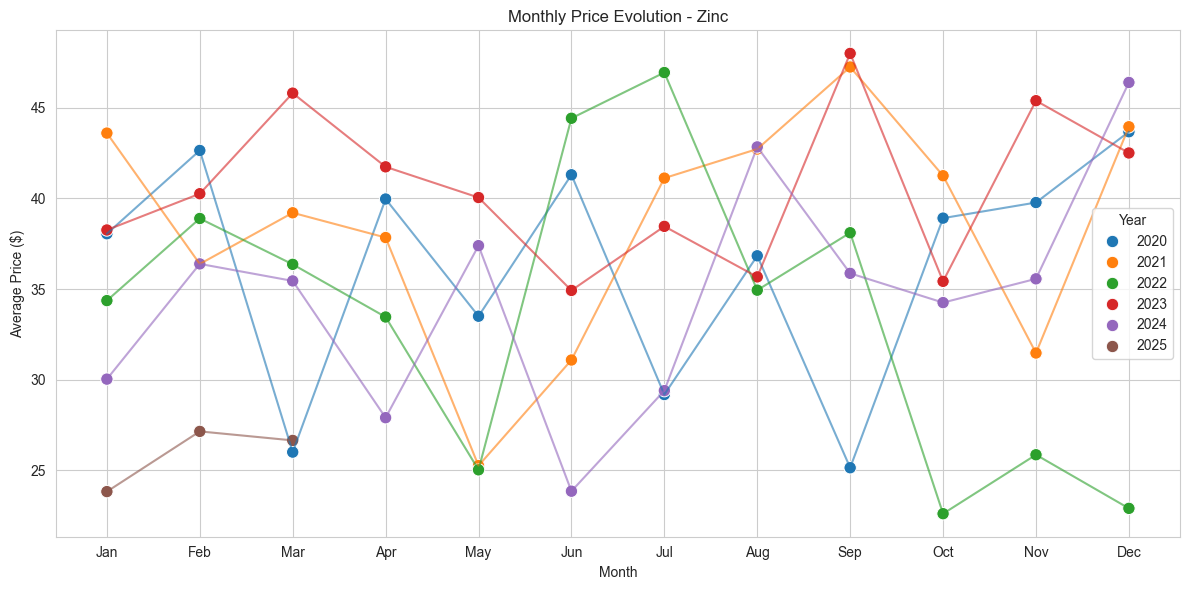

In [6]:
# --- 3.2. Monthly Price Trends (Year-over-Year Comparison) ---
# Extract Year and Month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Group by Product, Year, and Month -> Average Price
monthly_prices = df.groupby(["Product_Name", "Year", "Month"])["Price"].mean().reset_index()

productos = monthly_prices["Product_Name"].unique()

for producto in productos:
    subset = monthly_prices[monthly_prices["Product_Name"] == producto]
    
    plt.figure(figsize=(12,6))
    
    # Scatter + line connecting each year
    sns.scatterplot(
        x="Month", y="Price", hue="Year",
        data=subset, palette="tab10", s=80
    )
    sns.lineplot(
        x="Month", y="Price", hue="Year",
        data=subset, palette="tab10", legend=False, alpha=0.6
    )
    
    plt.title(f"Monthly Price Evolution - {producto}")
    plt.xlabel("Month")
    plt.ylabel("Average Price ($)")
    plt.xticks(ticks=range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

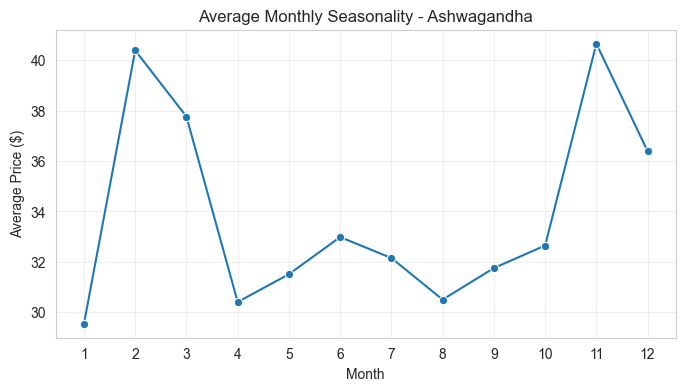

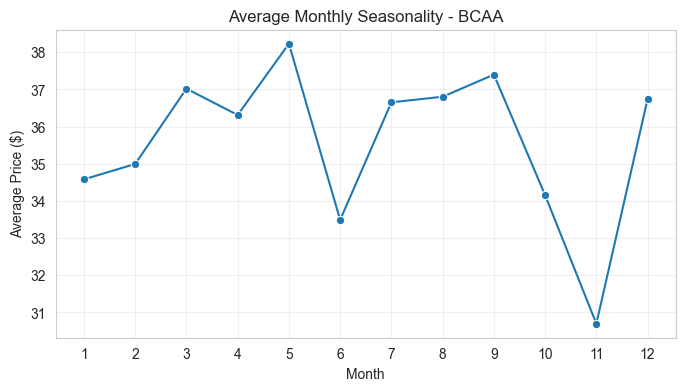

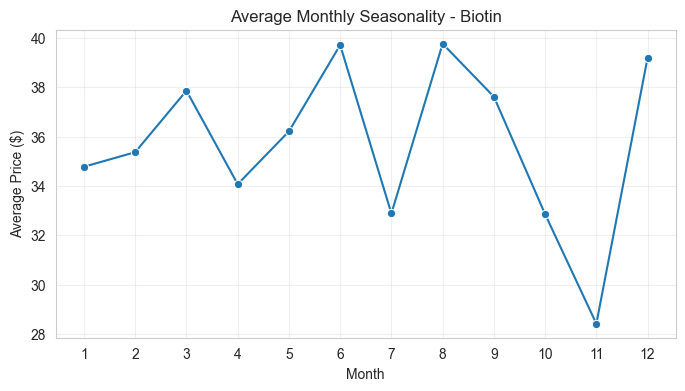

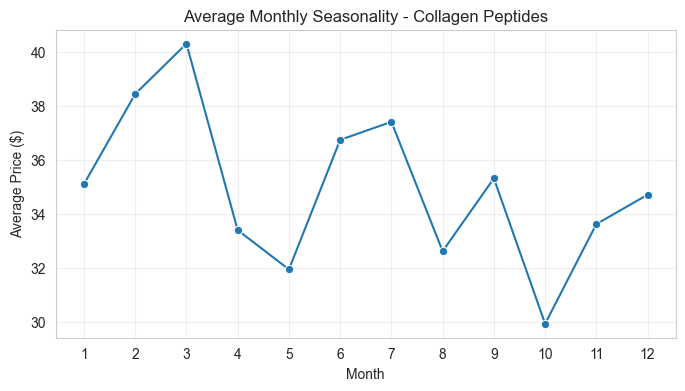

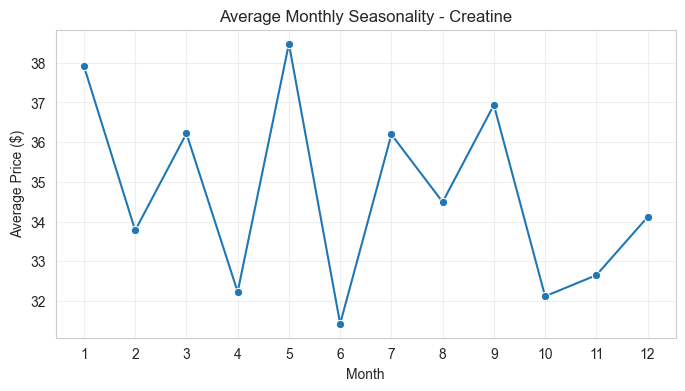

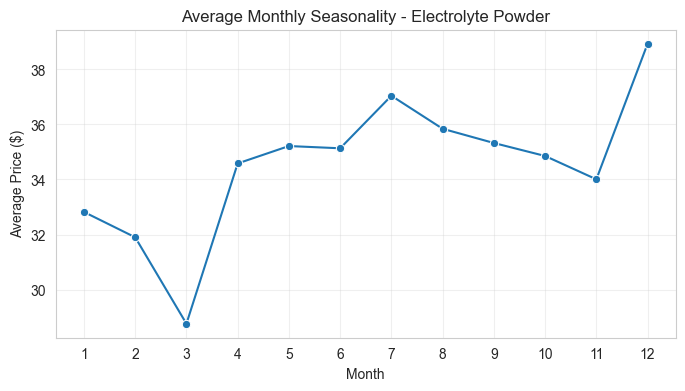

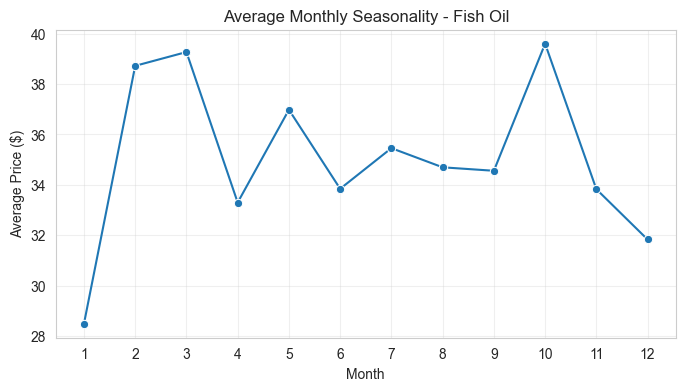

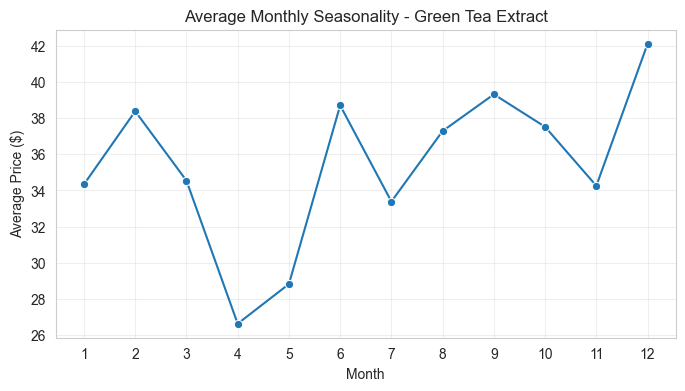

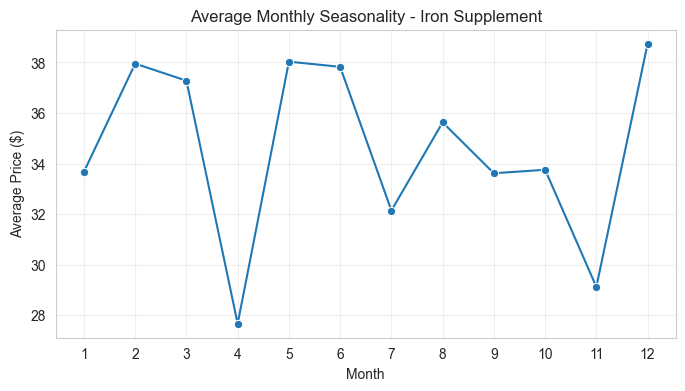

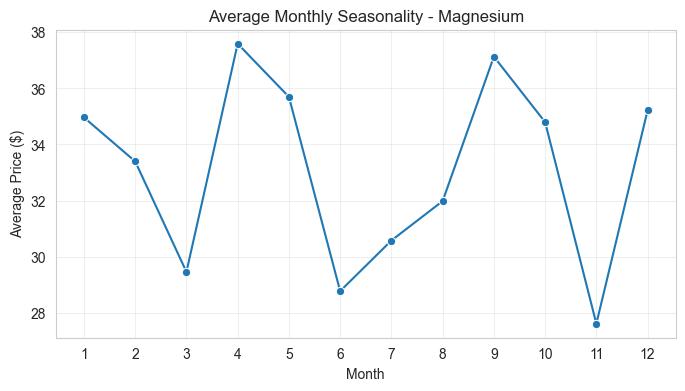

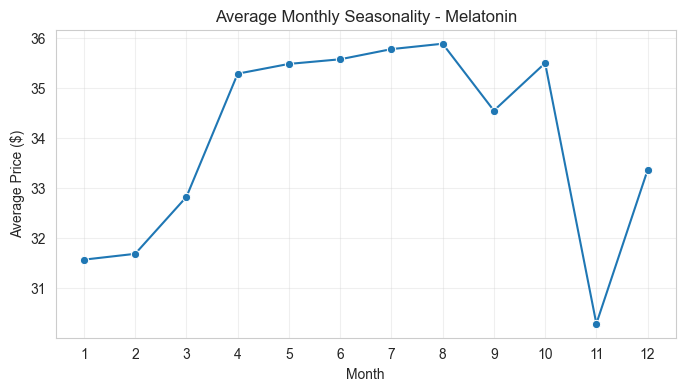

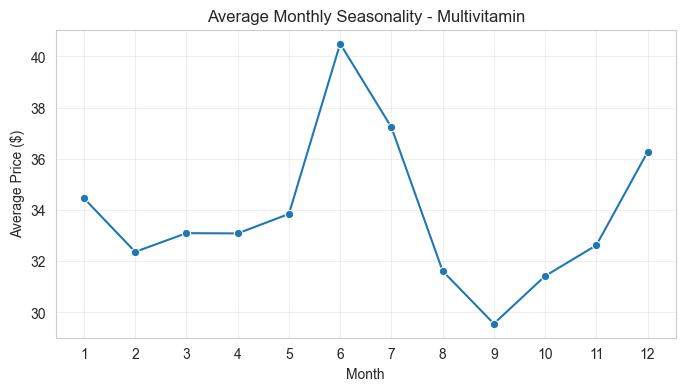

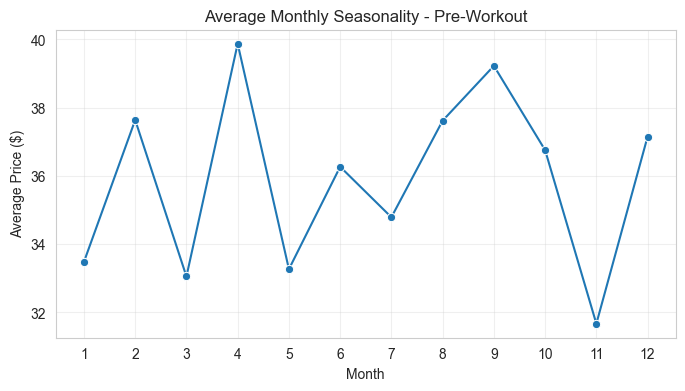

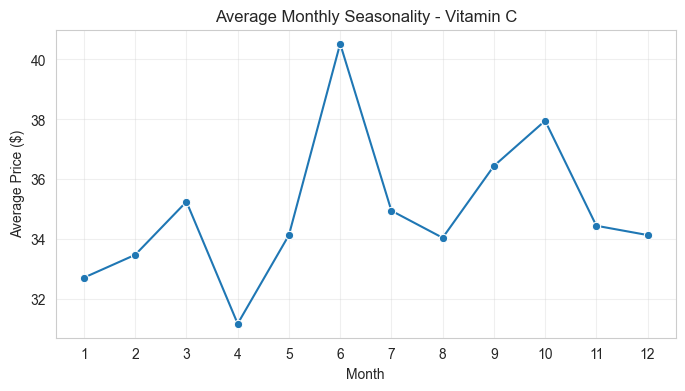

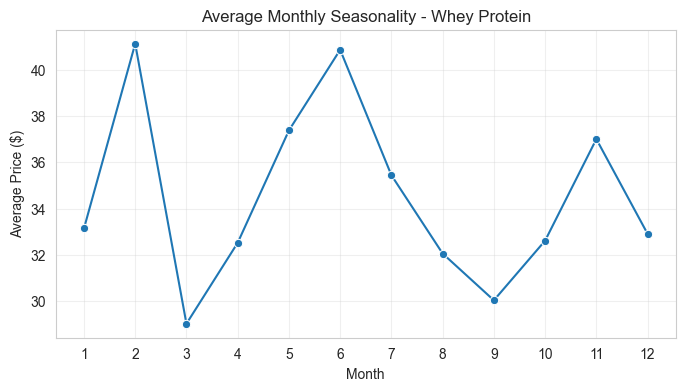

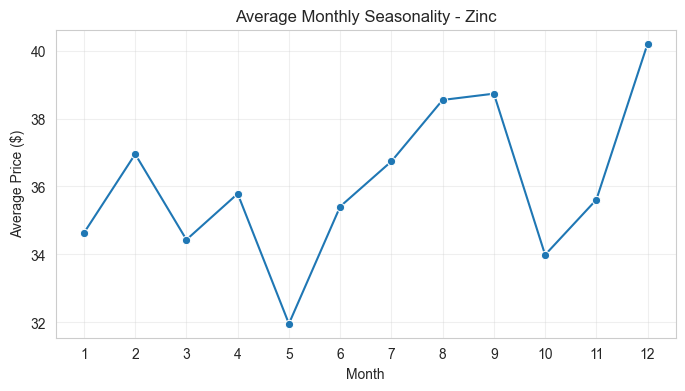

In [7]:
# --- 3.3. Overall Seasonal Pattern (Averaged across all years) ---

for producto in productos:
    subset = df[df["Product_Name"] == producto].copy() # Ensure using original DF
    
    # Average by month (all years combined)
    monthly_avg = subset.groupby("Month")["Price"].mean().reset_index()
    
    # Create independent plot
    plt.figure(figsize=(8, 4))
    sns.lineplot(x="Month", y="Price", data=monthly_avg, marker="o")
    plt.title(f"Average Monthly Seasonality - {producto}", fontsize=12)
    plt.xticks(range(1, 13))
    plt.xlabel("Month")
    plt.ylabel("Average Price ($)")
    plt.grid(alpha=0.3)
    plt.show()